In [1]:
# import lib
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

np.random.seed(6789)

(100, 2)


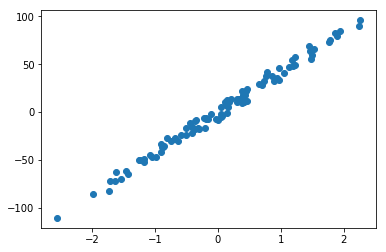

In [40]:
# create data
n_samples  = 100
n_outliers = 5
x, y      = datasets.make_regression(n_samples=n_samples, n_features=1,n_informative=1, noise=4, random_state=0)
X         = np.append(x,y[:,None],1)  

print(X.shape)
x -= np.mean(x, axis = 0)
plt.scatter(X[:,0],X[:,1]); plt.show()

In [55]:
# simple objective
w = np.random.uniform(0,1,size=(2,1))
# w = np.random.randn(2,1)
w = w / np.sqrt((w**2).sum())
print(w)
m = np.zeros_like(w)
v = np.zeros_like(w)

[[0.11840995]
 [0.99296479]]


In [56]:
# simple objective
for iter in range(3000):
    loss = (X - X @ w @ w.T)
    grad = (X.T @ loss @ w) + (w.T@X.T@loss).T
    
    m = 0.9 * m   + (1-0.9)   * grad
    v = 0.999 * v + (1-0.999) * grad ** 2
    
    m_hat = m/(1-0.9)
    v_hat = v/(1-0.999)
    
    if iter%100 == 0 :
        print("Current loss: " + str((loss**2).mean()) + "  Weight : " + str(w.ravel()))
    w = w - 0.0000008 * (m_hat/(np.sqrt(v_hat)+1e-8))
    w = w / np.sqrt((w**2).sum())


Current loss: 8.426213432514743  Weight : [0.11840995 0.99296479]
Current loss: 8.449286284317232  Weight : [0.11853999 0.99294928]
Current loss: 8.462743138850762  Weight : [0.11861575 0.99294023]
Current loss: 8.47334343244652  Weight : [0.11867539 0.99293311]
Current loss: 8.48250609957663  Weight : [0.11872691 0.99292695]
Current loss: 8.490777009885978  Weight : [0.11877339 0.99292139]
Current loss: 8.498433951970426  Weight : [0.1188164  0.99291624]
Current loss: 8.505640589933703  Weight : [0.11885687 0.9929114 ]
Current loss: 8.512502639199948  Weight : [0.11889538 0.99290679]
Current loss: 8.519092862528526  Weight : [0.11893235 0.99290236]
Current loss: 8.52546372946457  Weight : [0.11896808 0.99289808]
Current loss: 8.531654447241628  Weight : [0.11900279 0.99289392]
Current loss: 8.537695146493814  Weight : [0.11903664 0.99288986]
Current loss: 8.543609512392008  Weight : [0.11906977 0.99288589]
Current loss: 8.54941651268049  Weight : [0.11910229 0.99288199]
Current loss: 

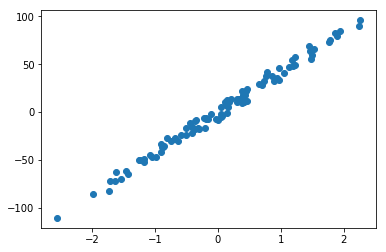

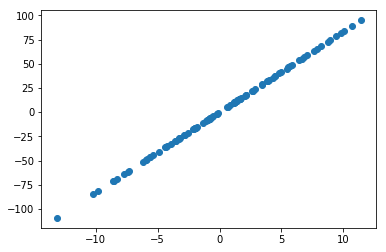

[[0.11958149]
 [0.99282439]]


In [57]:
recon = (X @ w @ w.T)
plt.scatter(X[:,0],X[:,1]); 
plt.show()
plt.scatter(recon[:,0],recon[:,1]); plt.show()
print(w)

In [222]:
print(X.shape)

(100, 2)


(2,)


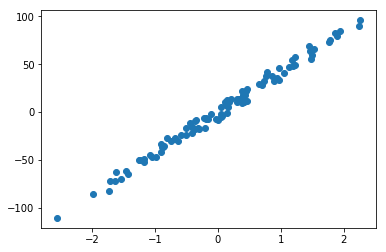

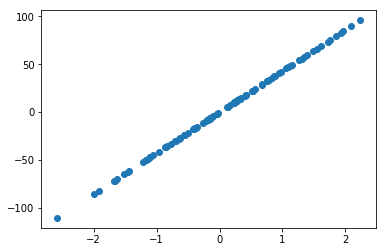

In [58]:
cov = X.T @ X / X.shape[0]
evals,evecs = np.linalg.eig(cov)
idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
evals = evals[idx]
print(evecs[0,:].shape)
good_project = evecs[0,:][:,None]
recon_gt = (X @ good_project @ good_project.T)
plt.scatter(X[:,0],X[:,1]);         plt.show()
plt.scatter(recon_gt[:,0],recon_gt[:,1]); plt.show()

In [59]:
good_project

array([[-0.02331227],
       [-0.99972823]])

In [60]:
w

array([[0.11958149],
       [0.99282439]])

In [65]:
# simple objective
w = np.random.uniform(0,1,size=(2,1))
w = w / np.sqrt((w**2).sum())
print(w)
m = np.zeros_like(w)
v = np.zeros_like(w)

# simple objective
for iter in range(3000):
    loss = (X - X @ w @ w.T)
    grad = (X.T @ loss @ w) + (w.T@X.T@loss).T + 0.01*w
    
    m = 0.9 * m   + (1-0.9)   * grad
    v = 0.999 * v + (1-0.999) * grad ** 2
    
    m_hat = m/(1-0.9)
    v_hat = v/(1-0.999)
    
    if iter%100 == 0 :
        print("Current loss: " + str((loss**2).mean()) + "  Weight : " + str(w.ravel()))
    w = w - 0.0000008 * (m_hat/(np.sqrt(v_hat)+1e-8))
    w = w / np.sqrt((w**2).sum())


[[0.9950689 ]
 [0.09918612]]
Current loss: 914.7043649737406  Weight : [0.9950689  0.09918612]
Current loss: 914.7334171361395  Weight : [0.99508167 0.09905787]
Current loss: 914.7503126297329  Weight : [0.9950891  0.09898323]
Current loss: 914.7635975198775  Weight : [0.99509494 0.0989245 ]
Current loss: 914.7750639943379  Weight : [0.99509998 0.09887379]
Current loss: 914.7854014190572  Weight : [0.99510452 0.09882806]
Current loss: 914.7949605722503  Weight : [0.99510873 0.09878575]
Current loss: 914.8039481018756  Weight : [0.99511267 0.09874596]
Current loss: 914.8124974747992  Weight : [0.99511643 0.0987081 ]
Current loss: 914.8207005450237  Weight : [0.99512003 0.09867176]
Current loss: 914.8286235412005  Weight : [0.99512352 0.09863666]
Current loss: 914.8363159456794  Weight : [0.99512689 0.09860256]
Current loss: 914.843815780372  Weight : [0.99513019 0.09856931]
Current loss: 914.8511529293764  Weight : [0.99513341 0.09853677]
Current loss: 914.8583513211208  Weight : [0.995

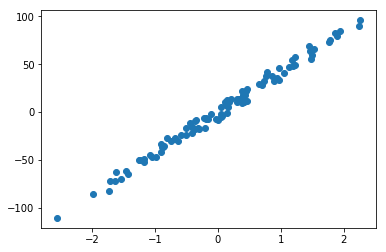

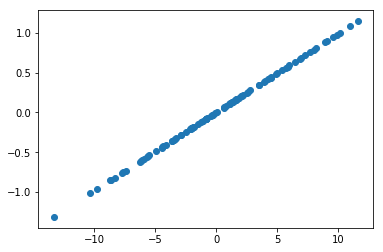

[[0.99518299]
 [0.09803477]]


In [66]:
recon = (X @ w @ w.T)
plt.scatter(X[:,0],X[:,1]); 
plt.show()
plt.scatter(recon[:,0],recon[:,1]); plt.show()
print(w)

In [56]:
# simple objective
w = np.random.randn(2,1)
print(w)

ww = w/np.sqrt((w**2).sum())
print(ww)
print((ww**2).sum())

[[-0.99090501]
 [ 0.4142096 ]]
[[-0.92263583]
 [ 0.3856723 ]]
1.0


In [54]:
temp = np.array([np.sqrt(2)/2,np.sqrt(2)/2])
print(np.sqrt(temp**2).sum())
print(
np.linalg.norm(temp)
)
print(
np.sqrt((temp**2).sum())
)
print(
temp@temp.T
)
print(
(temp**2).sum()
)

1.4142135623730951
1.0
1.0
1.0000000000000002
1.0000000000000002


# Reference 
1. Brownlee, J. (2018). How to Generate Test Datasets in Python with scikit-learn. Machine Learning Mastery. Retrieved 30 March 2019, from https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/
2. notebook, S., & Davies, L. (2017). Shortcut key for changing code cell to markdown cell in jupyter notebook. Stack Overflow. Retrieved 30 March 2019, from https://stackoverflow.com/questions/47787721/shortcut-key-for-changing-code-cell-to-markdown-cell-in-jupyter-notebook
3. NumPy?, H., Hoogendoorn, E., Feicho, E., Travnik, J., & Hsu, W. (2014). How to normalize an array in NumPy?. Stack Overflow. Retrieved 30 March 2019, from https://stackoverflow.com/questions/21030391/how-to-normalize-an-array-in-numpy
4. An overview of gradient descent optimization algorithms. (2016). Sebastian Ruder. Retrieved 30 March 2019, from http://ruder.io/optimizing-gradient-descent/index.html#adam
5. results, P., & Rieble, N. (2016). PCA in numpy and sklearn produces different results. Cross Validated. Retrieved 30 March 2019, from https://stats.stackexchange.com/questions/235882/pca-in-numpy-and-sklearn-produces-different-resultsa